<a href="https://colab.research.google.com/github/khemsu/Data_Warehosuing_and_mining_labs/blob/main/DatawarehouseLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
url = "https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol=ADBL&fromDate=2020-04-19&toDate=2025-05-19&pageNo=1&itemsPerPage=10&pagePerDisplay=5&_=1747618698241"
response = requests.get(url)
data = response.json()
stock_data = data.get("result", {}).get("data", [])
df = pd.DataFrame(stock_data)
df.to_csv("adbl_stock_history.csv", index=False)

In [4]:
import requests
import pandas as pd

def fetchStockData(symbol,start_date,end_date):
  url = f"https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol={symbol}&fromDate={start_date}&toDate={end_date}&pageNo=1&itemsPerPage=1000&pagePerDisplay=5&_=1747618698241"
  response = requests.get(url)
  data = response.json()

  stock_data = data.get("result", {}).get("data", [])
  df = pd.DataFrame(stock_data)
  df.to_csv(f"{symbol}_stock_history.csv", index=False)

In [5]:
fetchStockData("ADBL","2020-01-01","2025-01-01")

### Data Cleaning


In [6]:
df=pd.read_csv("ADBL_stock_history.csv")
df.head()

,sn,tradeDate,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
0,1,2025-01-01T00:00:00,2025-01-01,315.0,307.0,307.1,255,33089,10242782.0,314.00,-6.90,-2.20
1,2,2024-12-31T00:00:00,2024-12-31,321.9,309.8,314.0,405,52420,16402482.9,324.17,-10.17,-3.14
2,3,2024-12-29T00:00:00,2024-12-29,337.0,332.0,333.9,538,105485,35314898.3,333.80,0.10,0.03
3,4,2024-12-26T00:00:00,2024-12-26,335.0,322.0,333.8,335,53904,17759346.6,326.90,6.90,2.11
4,5,2024-12-24T00:00:00,2024-12-24,329.0,322.1,326.9,180,24396,7956093.7,325.00,1.90,0.58


In [7]:
isnull=df.isnull()
isnull_count= isnull.sum()
print(f"total number of null values {isnull_count}")

total number of null values sn                  0
tradeDate           0
tradeDateString     0
maxPrice            0
minPrice            0
closingPrice        0
noOfTransactions    0
volume              0
amount              0
previousClosing     0
differenceRs        0
percentChange       0
dtype: int64


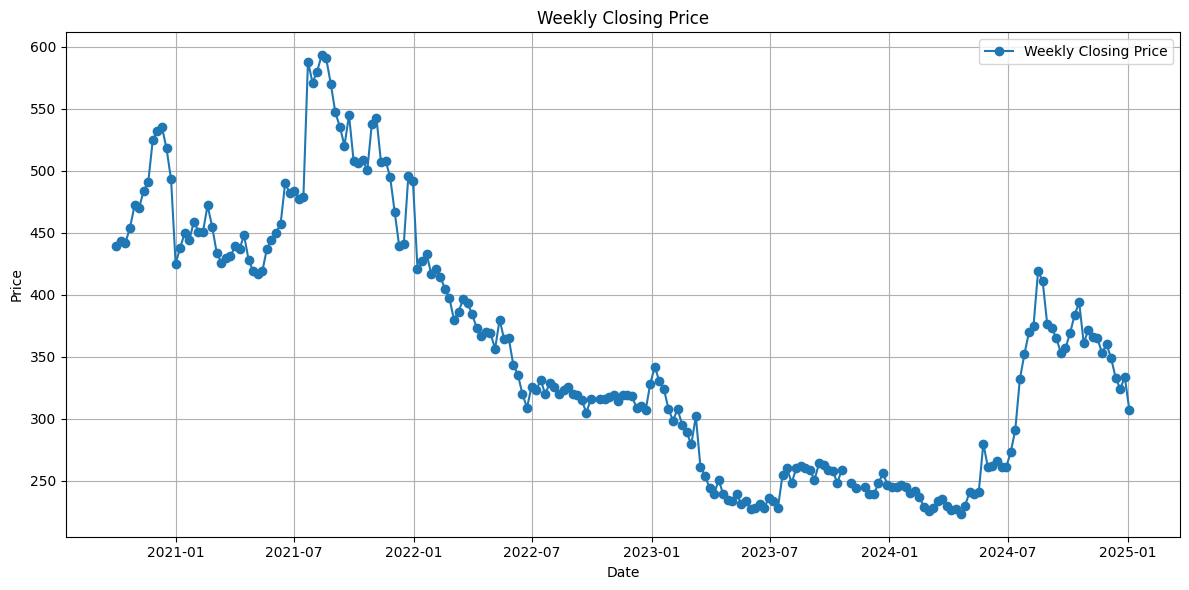

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ADBL_stock_history.csv", parse_dates=["tradeDate"])


df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)


weekly_df = pd.DataFrame()
weekly_df["closingPrice"] = df["closingPrice"].resample("W-FRI").last()
weekly_df["maxPrice"] = df["maxPrice"].resample("W-FRI").max()
weekly_df["minPrice"] = df["minPrice"].resample("W-FRI").min()
weekly_df["volume"] = df["volume"].resample("W-FRI").sum()
weekly_df["amount"] = df["amount"].resample("W-FRI").sum()
weekly_df["noOfTransactions"] = df["noOfTransactions"].resample("W-FRI").sum()


plt.figure(figsize=(12, 6))
plt.plot(weekly_df.index, weekly_df["closingPrice"], marker='o', label="Weekly Closing Price")
plt.title("Weekly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-9-2a68e874b728>:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["closingPrice"] = df["closingPrice"].resample("M").last()
<ipython-input-9-2a68e874b728>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["maxPrice"] = df["maxPrice"].resample("M").max()
<ipython-input-9-2a68e874b728>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["minPrice"] = df["minPrice"].resample("M").min()
<ipython-input-9-2a68e874b728>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["volume"] = df["volume"].resample("M").sum()
<ipython-input-9-2a68e874b728>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df["amount"] = df["amount"].resample("M").sum()
<ipython-input-9-2a

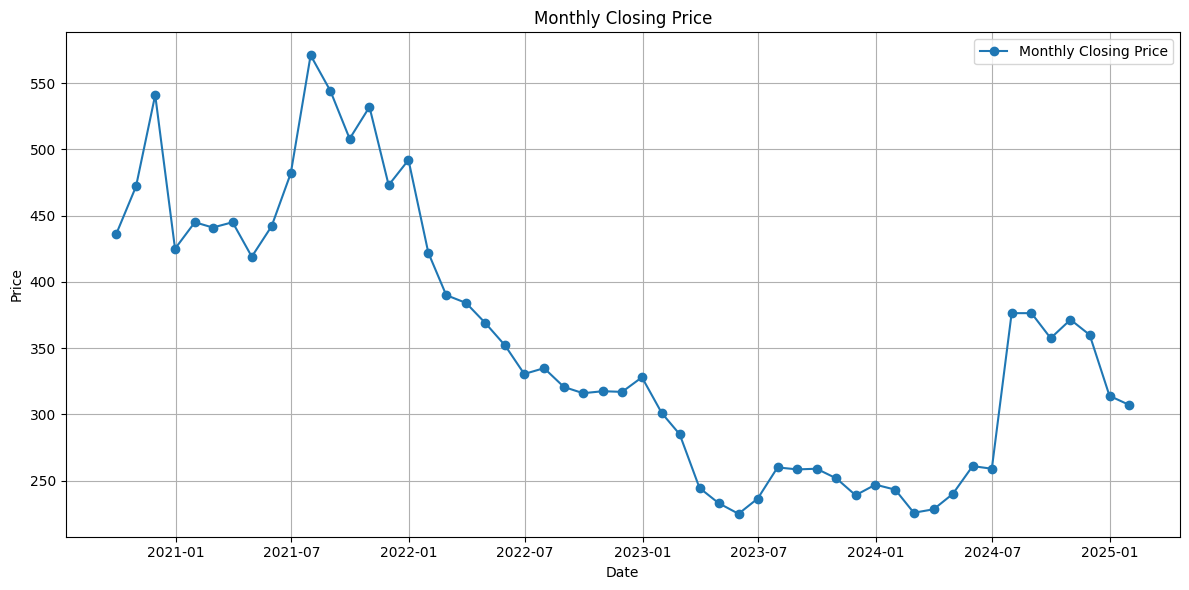

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("ADBL_stock_history.csv", parse_dates=["tradeDate"])

df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

monthly_df = pd.DataFrame()
monthly_df["closingPrice"] = df["closingPrice"].resample("M").last()
monthly_df["maxPrice"] = df["maxPrice"].resample("M").max()
monthly_df["minPrice"] = df["minPrice"].resample("M").min()
monthly_df["volume"] = df["volume"].resample("M").sum()
monthly_df["amount"] = df["amount"].resample("M").sum()
monthly_df["noOfTransactions"] = df["noOfTransactions"].resample("M").sum()


plt.figure(figsize=(12, 6))
plt.plot(monthly_df.index, monthly_df["closingPrice"], marker='o', label="Monthly Closing Price")
plt.title("Monthly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


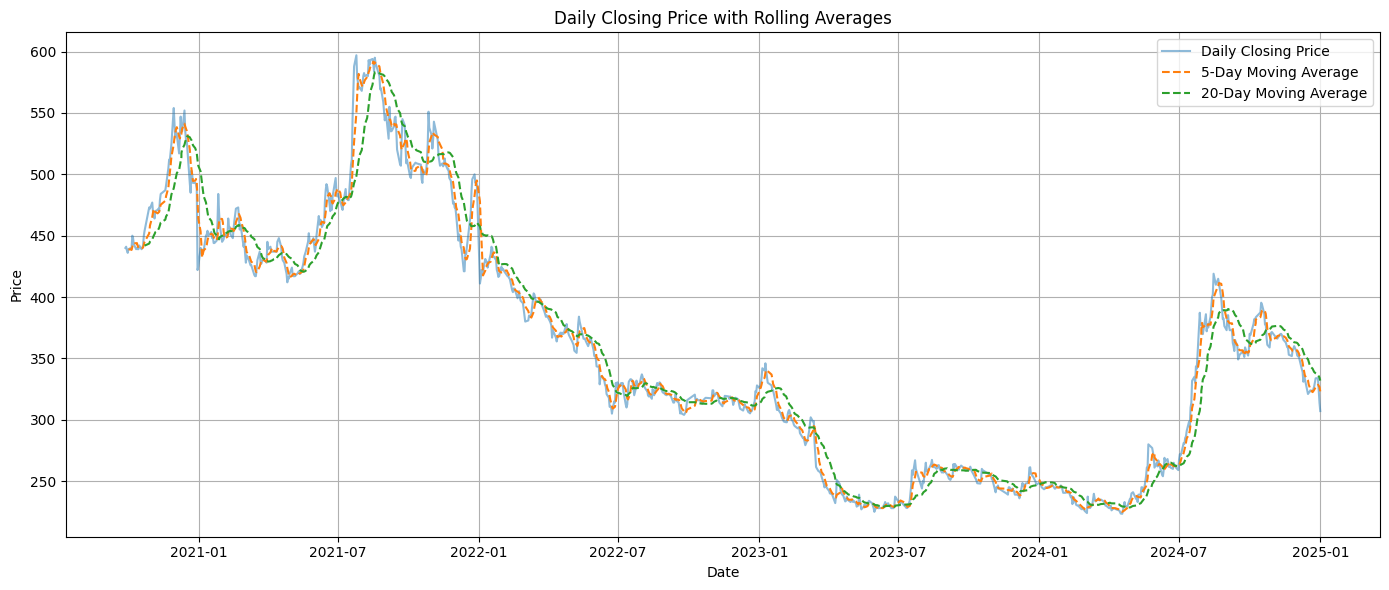

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ADBL_stock_history.csv", parse_dates=["tradeDate"])
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

df["MA_5"] = df["closingPrice"].rolling(window=5).mean()
df["MA_20"] = df["closingPrice"].rolling(window=20).mean()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Daily Closing Price", alpha=0.5)
plt.plot(df.index, df["MA_5"], label="5-Day Moving Average", linestyle="--")
plt.plot(df.index, df["MA_20"], label="20-Day Moving Average", linestyle="--")
plt.title("Daily Closing Price with Rolling Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


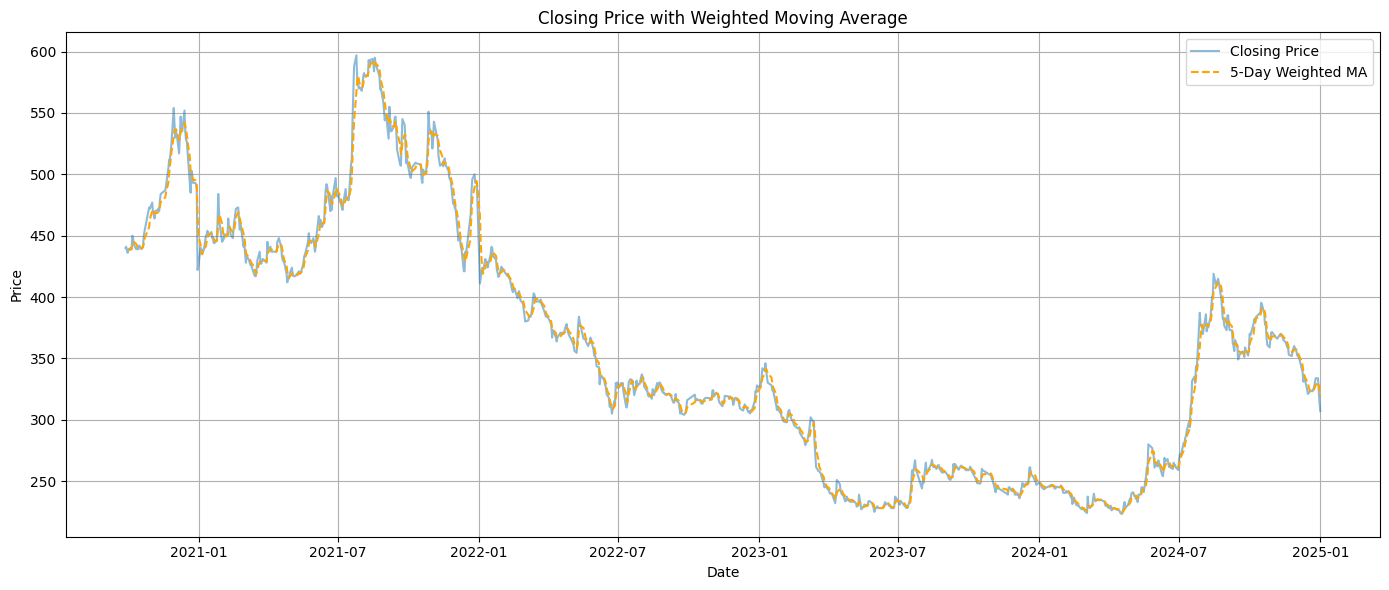

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("ADBL_stock_history.csv", parse_dates=["tradeDate"])
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)

def weighted_moving_avg(values):
    weights = np.arange(1, len(values)+1)  # e.g., [1,2,3,4,5]
    return np.dot(values, weights) / weights.sum()


df["WMA_5"] = df["closingPrice"].rolling(window=5).apply(weighted_moving_avg, raw=True)


plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.5)
plt.plot(df.index, df["WMA_5"], label="5-Day Weighted MA", linestyle="--", color='orange')
plt.title("Closing Price with Weighted Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


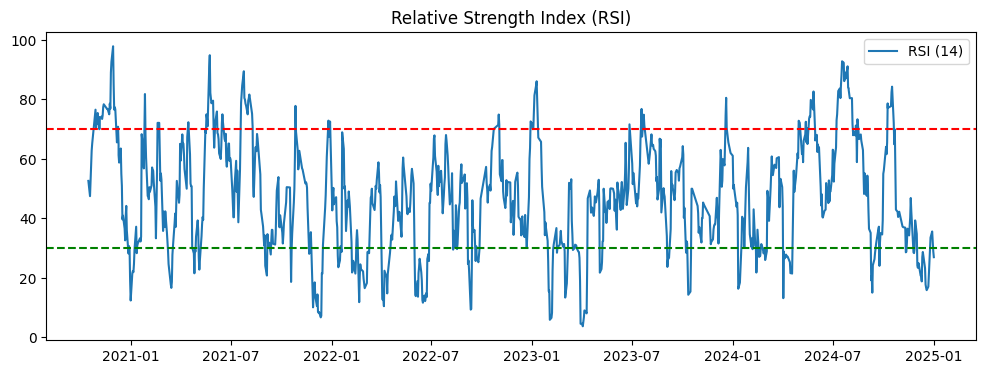

In [12]:
def compute_RSI(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)

    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def compute_OBV(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['closingPrice'].iloc[i] > df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] + df['volume'].iloc[i])
        elif df['closingPrice'].iloc[i] < df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] - df['volume'].iloc[i])
        else:
            obv.append(obv[-1])
    return pd.Series(obv, index=df.index)

def compute_CCI(df, window=20):
    TP = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
    MA = TP.rolling(window=window).mean()
    MD = TP.rolling(window=window).apply(lambda x: (x - x.mean()).abs().mean(), raw=False)
    CCI = (TP - MA) / (0.015 * MD)
    return CCI


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("ADBL_stock_history.csv", parse_dates=["tradeDate"])
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)


df["RSI_14"] = compute_RSI(df["closingPrice"], window=14)
df["OBV"] = compute_OBV(df)
df["CCI_20"] = compute_CCI(df, window=20)


plt.figure(figsize=(12, 4))
plt.plot(df.index, df["RSI_14"], label="RSI (14)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("Relative Strength Index (RSI)")
plt.legend()
plt.show()


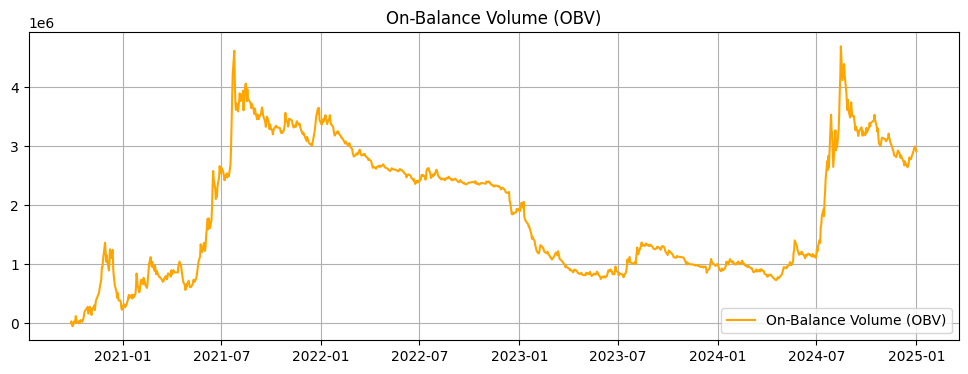

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["OBV"], label="On-Balance Volume (OBV)", color='orange')
plt.title("On-Balance Volume (OBV)")
plt.legend()
plt.grid(True)
plt.show()


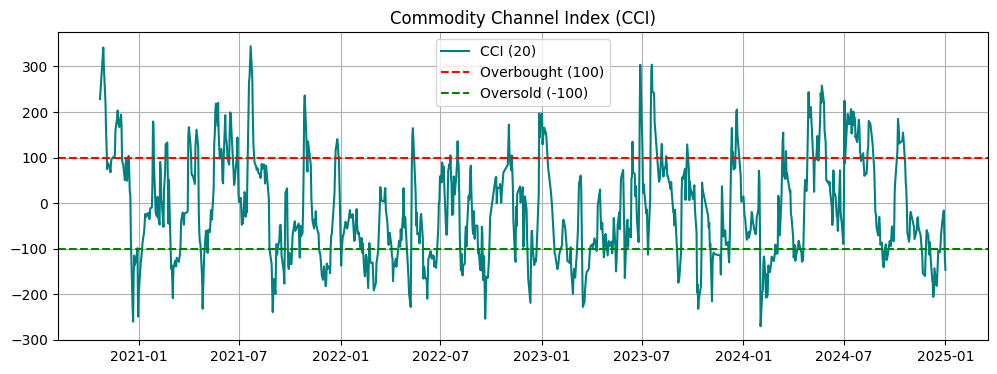

In [14]:
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["CCI_20"], label="CCI (20)", color='teal')
plt.axhline(100, color='red', linestyle='--', label='Overbought (100)')
plt.axhline(-100, color='green', linestyle='--', label='Oversold (-100)')
plt.title("Commodity Channel Index (CCI)")
plt.legend()
plt.grid(True)
plt.show()
